# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | They changed our Flights from ...
1,Not Verified | At Copenhagen the most chaotic...
2,✅ Trip Verified | Worst experience of my life...
3,✅ Trip Verified | Due to code sharing with Ca...
4,✅ Trip Verified | LHR check in was quick at t...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
data = pd.DataFrame()
data['reviews'] = df.reviews.str.split('|',expand=True)[1]
print(data)

                                               reviews
0      They changed our Flights from Brussels to Lo...
1      At Copenhagen the most chaotic ticket counte...
2      Worst experience of my life trying to deal w...
3      Due to code sharing with Cathay Pacific I wa...
4      LHR check in was quick at the First Wing and...
..                                                 ...
995    Linate to London. The morning of the departu...
996   Flew British Airways from JK to London Heathr...
997   I have flown British Airways numerous times o...
998   We can not fault the new 'Club World' food an...
999    Very disappointing experience - flew out on ...

[1000 rows x 1 columns]


## Data Cleaning

In [5]:
import re


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Replace non-alphabetic characters with a space
    text = re.sub('[^a-z]+', ' ', str(text))
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    return text

# Cleaning the text in the review column
data['Cleaned_Reviews'] = data['reviews'].apply(clean_text)
data

,reviews,Cleaned_Reviews
0,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lond...
1,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter ...
2,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wit...
3,Due to code sharing with Cathay Pacific I wa...,due to code sharing with cathay pacific i was ...
4,LHR check in was quick at the First Wing and...,lhr check in was quick at the first wing and q...
...,...,...
995,Linate to London. The morning of the departu...,linate to london the morning of the departure ...
996,Flew British Airways from JK to London Heathr...,flew british airways from jk to london heathro...
997,I have flown British Airways numerous times o...,i have flown british airways numerous times ov...
998,We can not fault the new 'Club World' food an...,we can not fault the new club world food and s...


In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Obtaining the stem words – Lemmatization


def lemmatized(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the lemmatized tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

data['Lemmatized'] = data['Cleaned_Reviews'].apply(lemmatized)
data.head()

,reviews,Cleaned_Reviews,Lemmatized
0,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lond...,changed flight brussels london heathrow lax pa...
1,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter ...,copenhagen chaotic ticket counter assignment h...
2,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wit...,worst experience life trying deal customer ser...
3,Due to code sharing with Cathay Pacific I wa...,due to code sharing with cathay pacific i was ...,due code sharing cathay pacific downgraded ba ...
4,LHR check in was quick at the First Wing and...,lhr check in was quick at the first wing and q...,lhr check quick first wing quickly security fi...


### A simple approach for sentiment analysis is to use a lexicon-based method, which relies on pre-defined sentiment dictionaries.
### There are several pre-defined sentiment lexicons available, such as AFINN, VADER, and SentiWordNet

## Sentiment Analysis using VADER
##### VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [10]:
#!pip install vaderSentiment
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate vader sentiment
def vader_sentiment_analysis(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

data['Sentiment_Score'] = data['Lemmatized'].apply(vader_sentiment_analysis)

# Function to analyze compund score and label it as positie or negative or netural
def score_analysis(score):
    if score >= 0.5:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Analysis'] = data['Sentiment_Score'].apply(score_analysis)
data

,reviews,Cleaned_Reviews,Lemmatized,Sentiment_Score,Analysis
0,They changed our Flights from Brussels to Lo...,they changed our flights from brussels to lond...,changed flight brussels london heathrow lax pa...,-0.7889,Negative
1,At Copenhagen the most chaotic ticket counte...,at copenhagen the most chaotic ticket counter ...,copenhagen chaotic ticket counter assignment h...,-0.0516,Negative
2,Worst experience of my life trying to deal w...,worst experience of my life trying to deal wit...,worst experience life trying deal customer ser...,-0.9601,Negative
3,Due to code sharing with Cathay Pacific I wa...,due to code sharing with cathay pacific i was ...,due code sharing cathay pacific downgraded ba ...,-0.7506,Negative
4,LHR check in was quick at the First Wing and...,lhr check in was quick at the first wing and q...,lhr check quick first wing quickly security fi...,0.9509,Positive
...,...,...,...,...,...
995,Linate to London. The morning of the departu...,linate to london the morning of the departure ...,linate london morning departure received email...,-0.7717,Negative
996,Flew British Airways from JK to London Heathr...,flew british airways from jk to london heathro...,flew british airway jk london heathrow connect...,-0.4588,Negative
997,I have flown British Airways numerous times o...,i have flown british airways numerous times ov...,flown british airway numerous time many year s...,-0.8277,Negative
998,We can not fault the new 'Club World' food an...,we can not fault the new club world food and s...,fault new club world food service outbound inb...,0.9832,Positive


In [11]:
sentiment_counts = data['Analysis'].value_counts()
sentiment_counts

Positive    514
Negative    376
Neutral     110
Name: Analysis, dtype: int64

## Sentiment Analysis Result

<Figure size 1500x700 with 0 Axes>

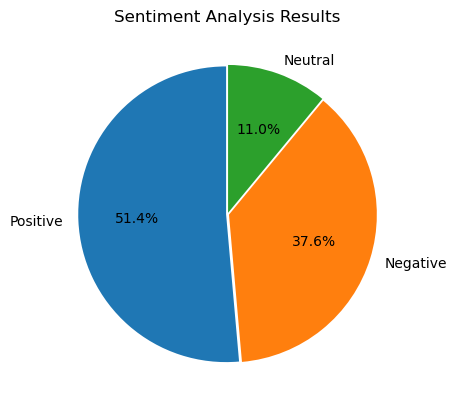

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize=(15,7))

plt.pie(sentiment_counts.values, labels = sentiment_counts.index, autopct='%1.1f%%', explode = (0.01, 0.01, 0.01), shadow=False, startangle=90)
plt.title('Sentiment Analysis Results')
plt.show()


In [13]:
data.to_csv("BA_reviews.csv")

## Wordcloud
#### Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

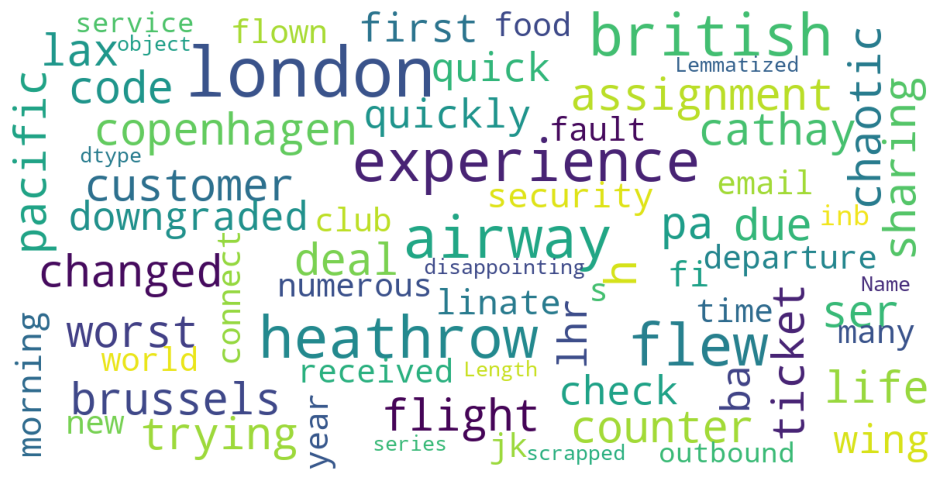

In [28]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(text):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
        )
    
    wordcloud = wordcloud.generate(str(text))
    
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data.Lemmatized)